<a href="https://colab.research.google.com/github/dantrica/Electrostatics/blob/master/F%C3%ADsica_m%C3%A9dica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalación e importe de las librerias

In [114]:
# instalando libreria pydicom
from google.colab import files
try:
  files.upload()
  !pip install pydicom
except:
  pass
# importando archivo *.dcm

import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file
import matplotlib.pyplot as pl
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk
from sklearn.cluster import KMeans

Saving 000038.dcm to 000038 (4).dcm


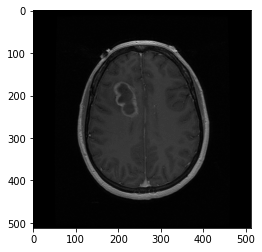

In [115]:
ds = dcmread('000038.dcm')
# The path to a pydicom test dataset
arr = ds.pixel_array
a = 4000#arr.max()

plt.imshow(arr, cmap="gray")
plt.show()

## a. Histograma de la imagen

En el histograma de la imagen se puede observar la máxima intensidad relacionada con el 

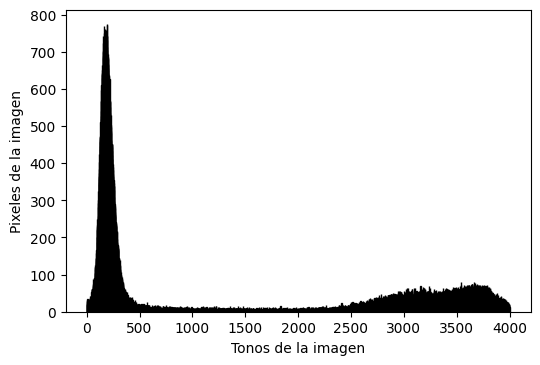

In [116]:
plt.figure(dpi=100)
plt.hist(arr.ravel(), bins=a, range=(1, a), fc='k', ec='k')
plt.xlabel('Tonos de la imagen')
plt.ylabel('Pixeles de la imagen')
plt.show()

## b. Entropía a partir del histograma de la imagen. 

## $H = -\sum_i p_i \log(p_i)$

Entropia: 7.227


/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type int16 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


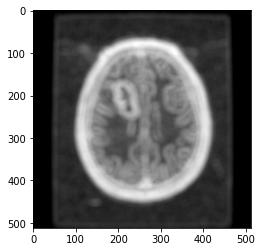

In [117]:
his, nbin = np.histogram(arr.ravel(), bins=a, range=(1,a), density=True)
k = his != 0
#len(his[k])
#plt.hist(his[k], bins=len(his[k]))
ent = -(his[k]*np.log(np.abs(his[k]))).sum()
print('Entropia: %0.3f' %ent)

e = entropy(arr, disk(10))
plt.imshow(e, cmap="gray")
plt.show()

## c. Implemente un código para realizar la clasificación y segmentación de la imagen mediante el algoritmo de k-means. Suponga 2 clases solamente. Si desea hacer algo más pruebe con un número de clases que le parezca bajo inspección del histograma.

### Clasificando la imagen en 10 cluster

In [193]:
#from sklearn.datasets import load_digits

#digits = load_digits()
#data = digits.data

data = arr
n = 10

kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(data)
Z = kmeans.predict(data)
Z.shape, Z

((512,),
 array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 

### Graficando los clusters

cluster 0
25 elements


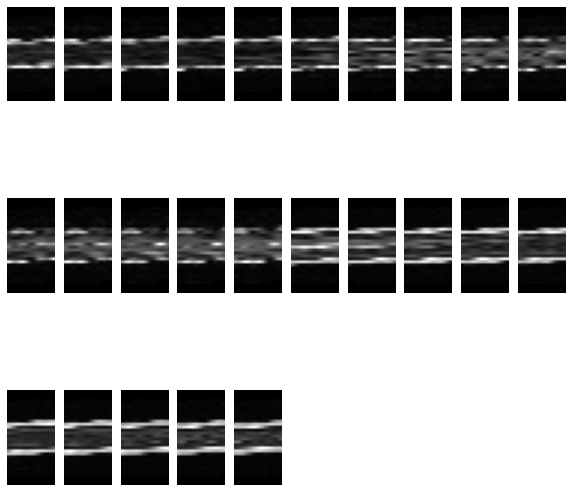

cluster 1
54 elements


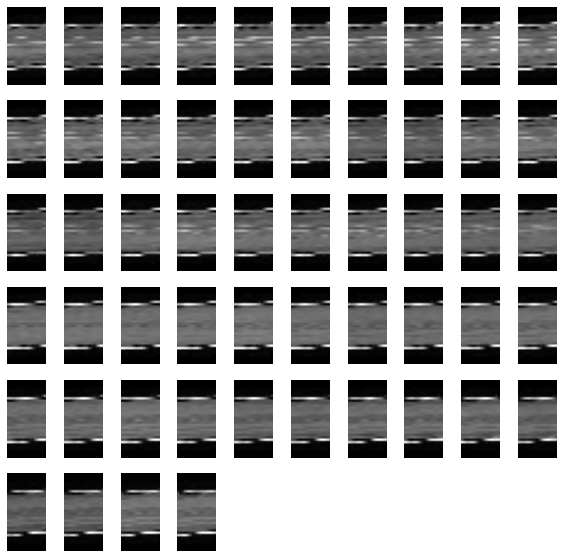

cluster 2
40 elements


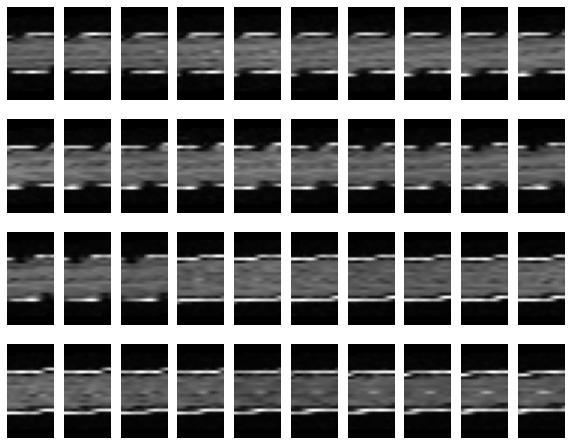

cluster 3
23 elements


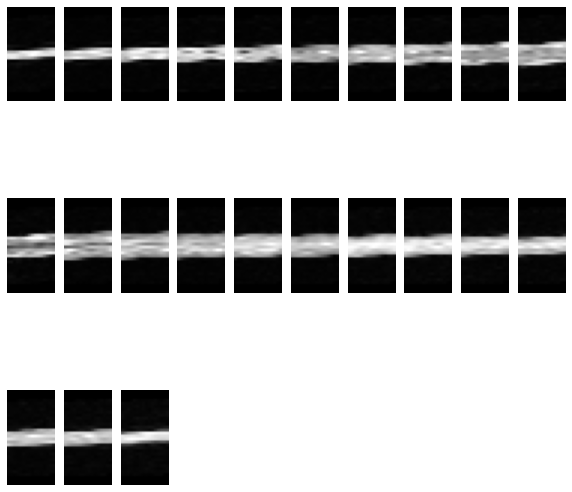

cluster 4
16 elements


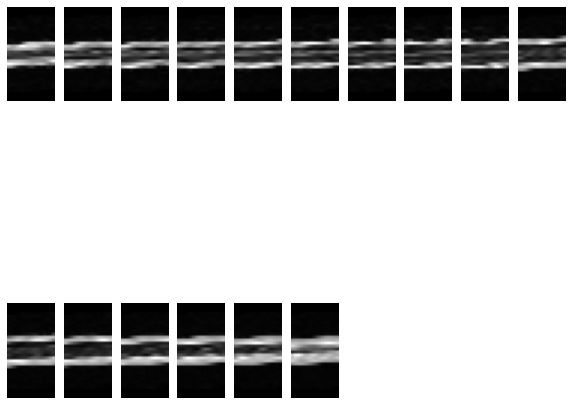

cluster 5
141 elements


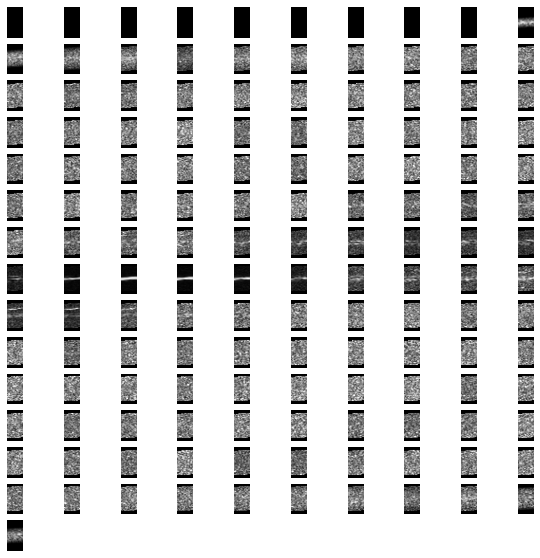

cluster 6
47 elements


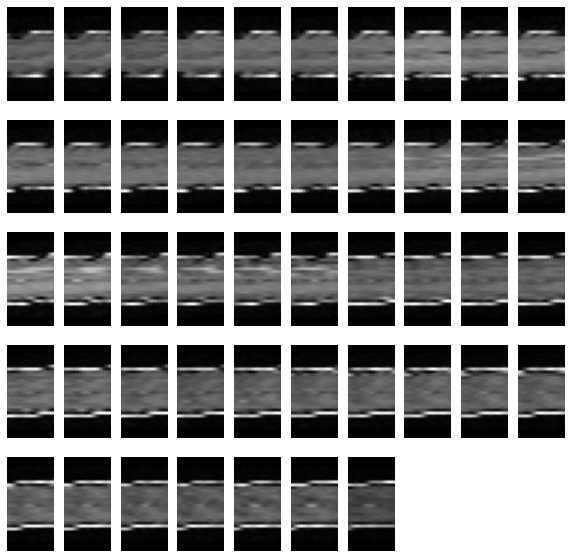

cluster 7
70 elements


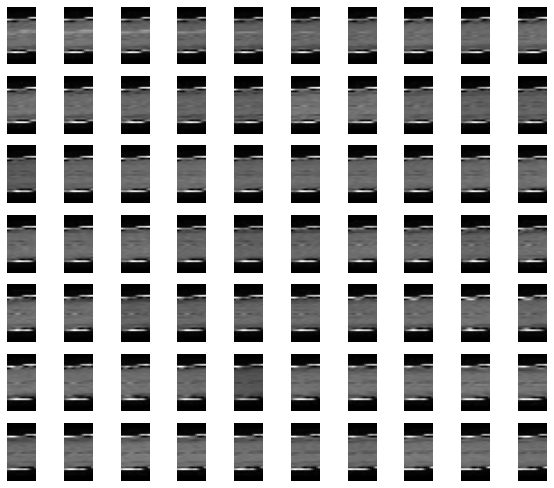

cluster 8
35 elements


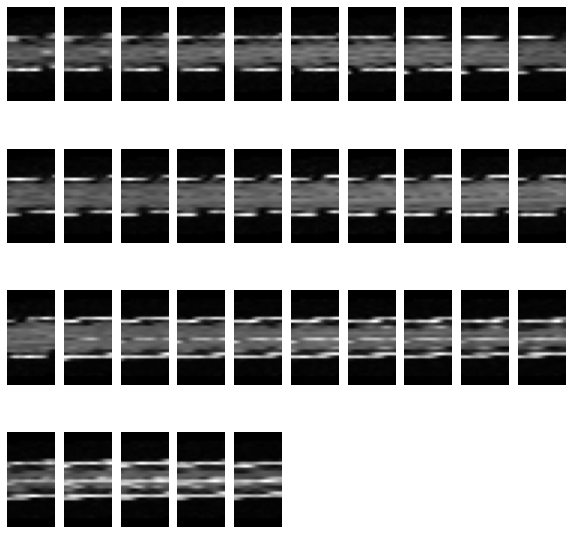

cluster 9
61 elements


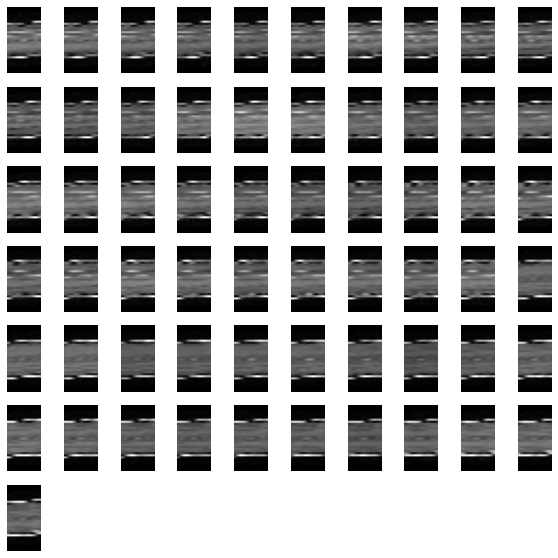

In [197]:
for i in range(0,n):

    row = np.where(Z==i)[0]  # row in Z for elements of cluster i
    num = row.shape[0]       #  number of elements for each cluster
    r = np.floor(num/10.)    # number of rows in the figure of the cluster 
    
    print("cluster "+str(i))
    print(str(num)+" elements")
    
    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = data[row[k], ]
        #print(image.shape)
        image = image.reshape(32, 16)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

### Segmentación de la imagen

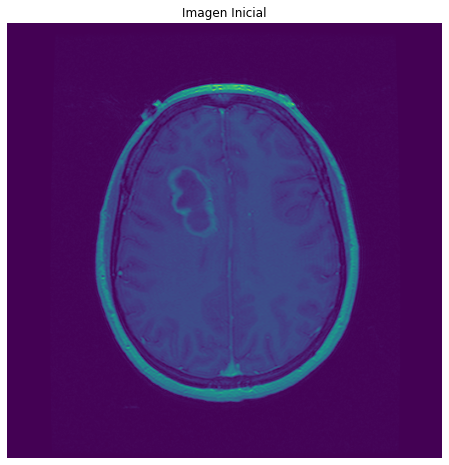

In [200]:
plt.figure(figsize=(8,8))
plt.imshow(arr)
plt.axis('off')
plt.title('Imagen Inicial')
plt.show()

### Imagen en blanco y negro

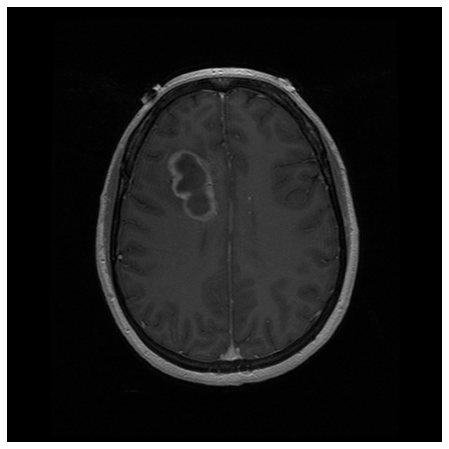

In [205]:
a = np.asarray(arr, dtype=np.float)

plt.figure(figsize=(8,8))
plt.imshow(a, cmap='gray')
plt.axis('off')
plt.show()

### Se cambian las dimesiones de la matriz de la imagen para aplicar k-means

In [206]:
x , y = a.shape
print('a shape ', a.shape)

a1 = a.reshape(x*y,1)
print('a1 shape ', a1.shape)

a shape  (512, 512)
a1 shape  (262144, 1)


### Se agrupan los pixeles en 2 clusters

In [208]:
k_means = KMeans(n_clusters=2)
k_means.fit(a1) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Se extraen los centroides y las etiquetas para cada pixel

In [213]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

### Se construye la imagen solo con 3 centroides

In [214]:
a2 = centroids[labels]
print('a2 shape ', a2.shape)
a3 = a2.reshape(x, y)
print('a3 shape ', a3.shape)

a2 shape  (262144, 1)
a3 shape  (512, 512)


### Finalmente se recosntruye la imagen segmentada

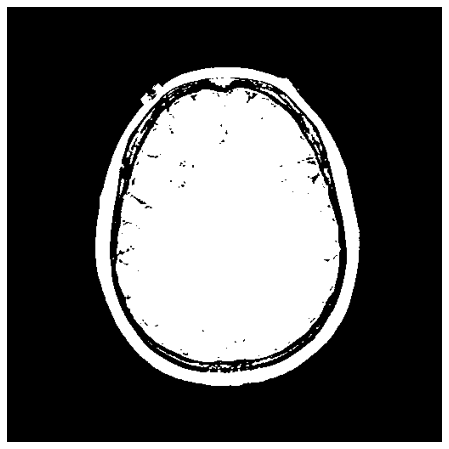

In [212]:
plt.figure(figsize=(8,8))
plt.imshow(a3,cmap='gray')
plt.axis('off')
plt.show()